In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('application_train.csv')  # adjust path if needed

# Preview the data
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### First Look

At first glance, this dataset appears to contain loan applications with personal and financial details of customers. Our target is the `TARGET` column:
- 0 → Loan was repaid
- 1 → Customer defaulted

I'll be looking for patterns in income, employment, credit history, etc. that might signal default risk.

In [6]:
# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 307511, Columns: 122


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Summary stats
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
df['TARGET'].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

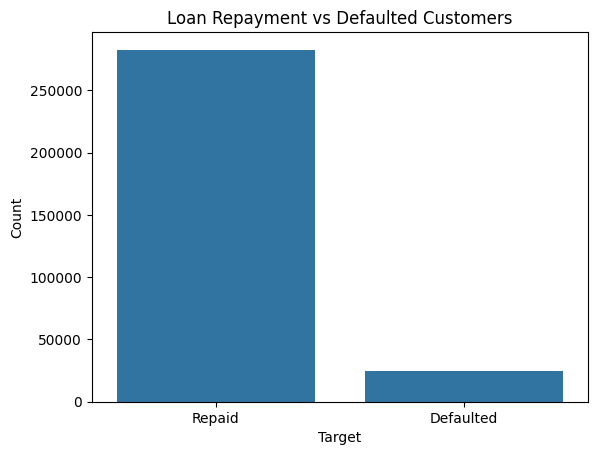

In [9]:
sns.countplot(x='TARGET', data=df)
plt.title('Loan Repayment vs Defaulted Customers')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

### Only around ~8% of customers actually defaulted — this is a classic imbalanced classification problem, which I’ll need to handle carefully in model training (maybe with SMOTE or class weights).

**## EDA (Exploratory Data Analysis)**

Do lower-income applicants default more often?

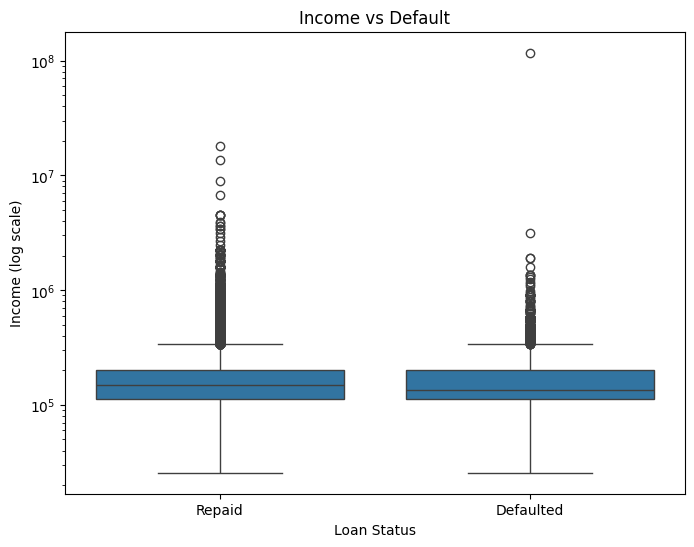

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df)
plt.yscale('log')  # use log scale for better readability
plt.title('Income vs Default')
plt.xticks([0, 1], ['Repaid', 'Defaulted'])
plt.xlabel('Loan Status')
plt.ylabel('Income (log scale)')
plt.show()


Defaulters tend to have slightly lower income, but there’s overlap. I might want to create a ratio like Loan Amount / Income for deeper insight.

Does having a longer job history mean lower risk?

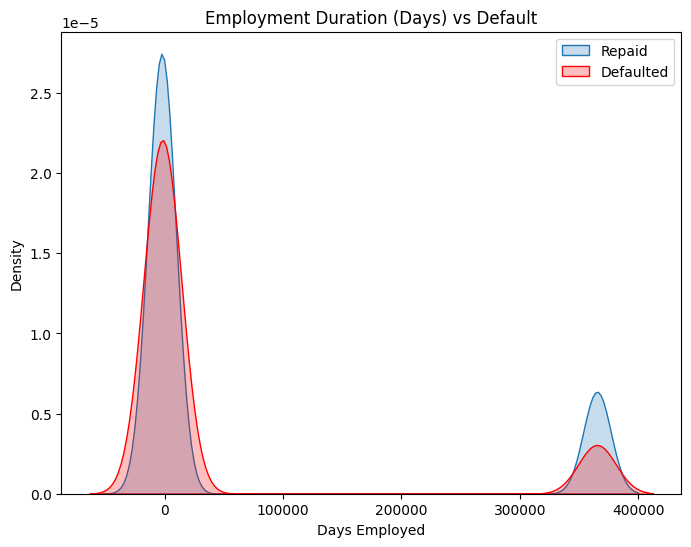

In [11]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=df[df['TARGET'] == 0], x='DAYS_EMPLOYED', label='Repaid', fill=True)
sns.kdeplot(data=df[df['TARGET'] == 1], x='DAYS_EMPLOYED', label='Defaulted', fill=True, color='red')
plt.title('Employment Duration (Days) vs Default')
plt.xlabel('Days Employed')
plt.legend()
plt.show()

Note:

This column is in negative days (e.g. -1000 means employed for 1000 days).

A value of 365243 = special placeholder (not working or missing) → we'll clean it later.

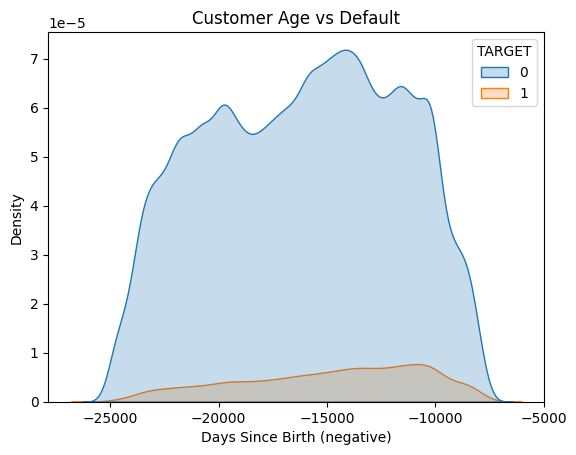

In [13]:
sns.kdeplot(data=df, x='DAYS_BIRTH', hue='TARGET', fill=True)
plt.title('Customer Age vs Default')
plt.xlabel('Days Since Birth (negative)')
plt.show()

Interestingly, younger applicants (smaller DAYS_BIRTH) seem more likely to default. Might be due to less stable income or shorter employment history.

## **Data Preprocessing**

In [14]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing[:15]  # show top 15 missing features

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_MODE            204488
YEARS_BUILD_MEDI            204488
dtype: int64

Some columns have a lot of missing values — I’ll decide whether to impute or drop based on data quality and importance.

Drop Columns with Too Many Missing Values (e.g., > 40%)

In [17]:
threshold = 0.4  # 40%
missing_ratio = df.isnull().mean()
df = df.drop(columns=missing_ratio[missing_ratio > threshold].index)
df.shape

(307511, 73)

In [18]:
# Separate categorical and numerical
categorical = df.select_dtypes(include='object').columns

# One-hot encode
df = pd.get_dummies(df, columns=categorical, drop_first=True)

In [20]:
#DAYS_EMPLOYED = 365243? Let’s replace that with NaN and impute:
# Replace special value with NaN
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, pd.NA)

# Fill missing with median
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].median())

In [22]:
print([col for col in df.columns if 'EXT_SOURCE' in col])

['EXT_SOURCE_2', 'EXT_SOURCE_3']


In [23]:
ext_scores = ['EXT_SOURCE_2', 'EXT_SOURCE_3']
df['EXT_SCORE_AVG'] = df[ext_scores].mean(axis=1)

In [24]:
# Drop ID column if it's there
if 'SK_ID_CURR' in df.columns:
    df = df.drop(columns=['SK_ID_CURR'])

X = df.drop(columns='TARGET')
y = df['TARGET']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
#Baseline Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [27]:
#Evaluation
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.67      0.00      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.79      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503

ROC-AUC Score: 0.7168060180861346


Baseline Random Forest gave a ROC-AUC of 0.72. Precision and recall show potential, but I can improve this with hyperparameter tuning or XGBoost. Next step: making the model interpretable using SHAP values.

XGBoost

In [ ]:
#Training the Model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'  # avoid warning
)

xgb_model.fit(X_train, y_train)

/Users/vijaysivakumar/Desktop/Projects/Credit Risk Modelling/home-credit-default-risk/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [01:47:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
#Evaluation
from sklearn.metrics import classification_report, roc_auc_score

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.57      0.01      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503

XGBoost ROC-AUC Score: 0.7511972804644718


Improved ROC-AUC score to 0.751

In [34]:
non_numeric_cols = X_train.select_dtypes(exclude='number').columns
print(non_numeric_cols)

Index(['NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'CODE_GENDER_XNA', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people',
       'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B',
       'NAME_TYPE_SUITE_Spouse, partner',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=112)


In [35]:
# Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill any NaNs just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_proba = logreg.predict_proba(X_test)[:, 1]

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_proba = rf.predict_proba(X_test)[:, 1]

# XGBoost was already trained
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Create comparison table
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [
        roc_auc_score(y_test, logreg_proba),
        roc_auc_score(y_test, rf_proba),
        roc_auc_score(y_test, xgb_proba)
    ]
}).sort_values(by='ROC-AUC', ascending=False)

results

/Users/vijaysivakumar/Desktop/Projects/Credit Risk Modelling/home-credit-default-risk/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,ROC-AUC
2,XGBoost,0.746025
1,Random Forest,0.716032
0,Logistic Regression,0.635412


## **SHAP EXPLAINABILITY**

In [37]:
import shap

# Use the TreeExplainer for XGBoost
explainer = shap.Explainer(xgb_model)

# Get SHAP values for the test set
shap_values = explainer(X_test)

/Users/vijaysivakumar/Desktop/Projects/Credit Risk Modelling/home-credit-default-risk/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


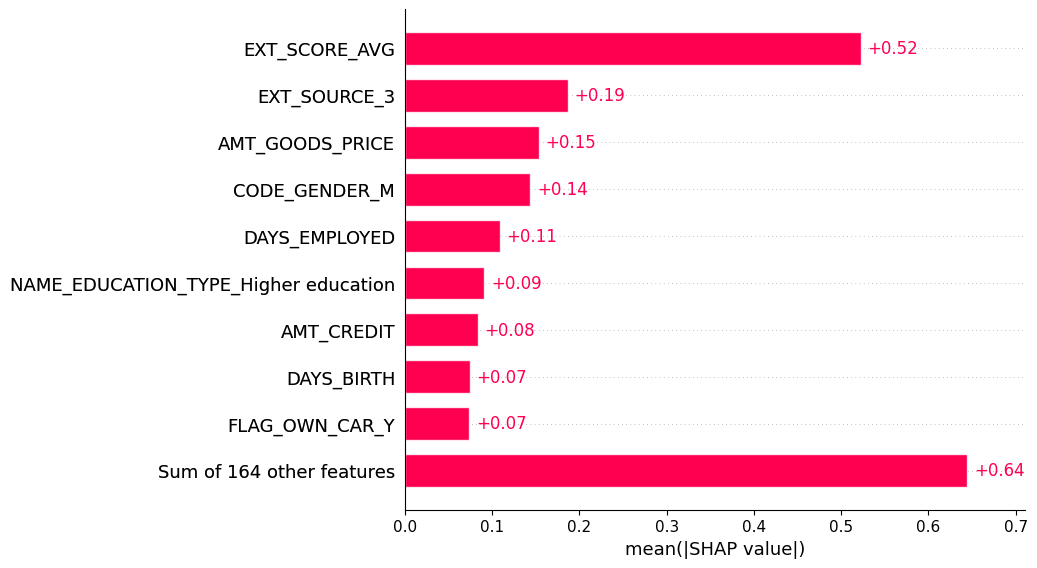

In [ ]:
# Global feature importance
shap.plots.bar(shap_values)

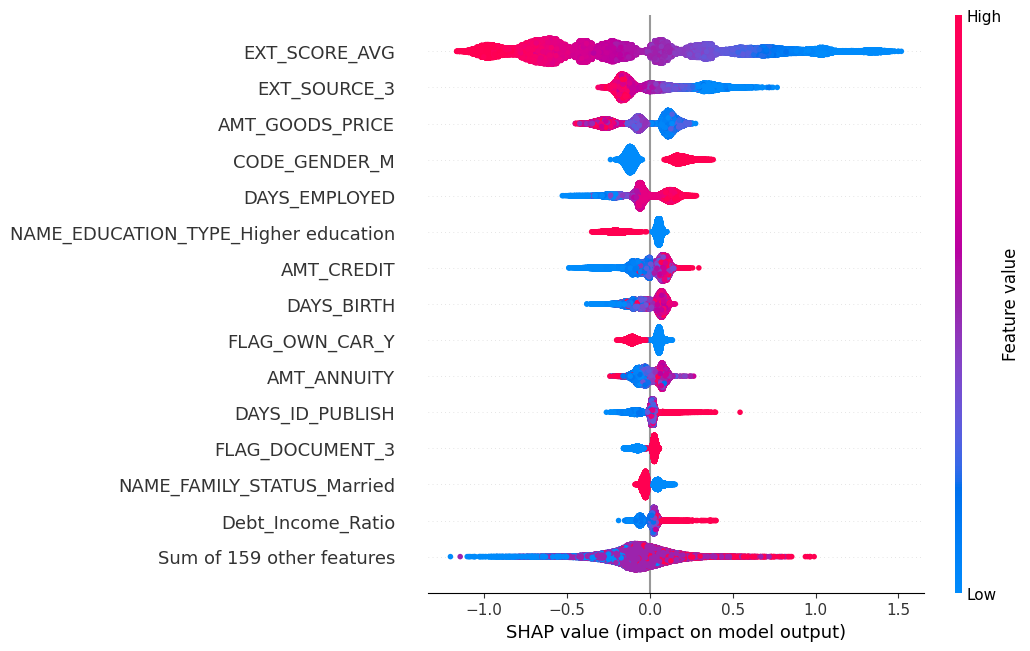

In [ ]:
# SHAP Summary (Impact on predictions)
shap.plots.beeswarm(shap_values, max_display=15)
#shows how each feature affects the model’s output across all samples.

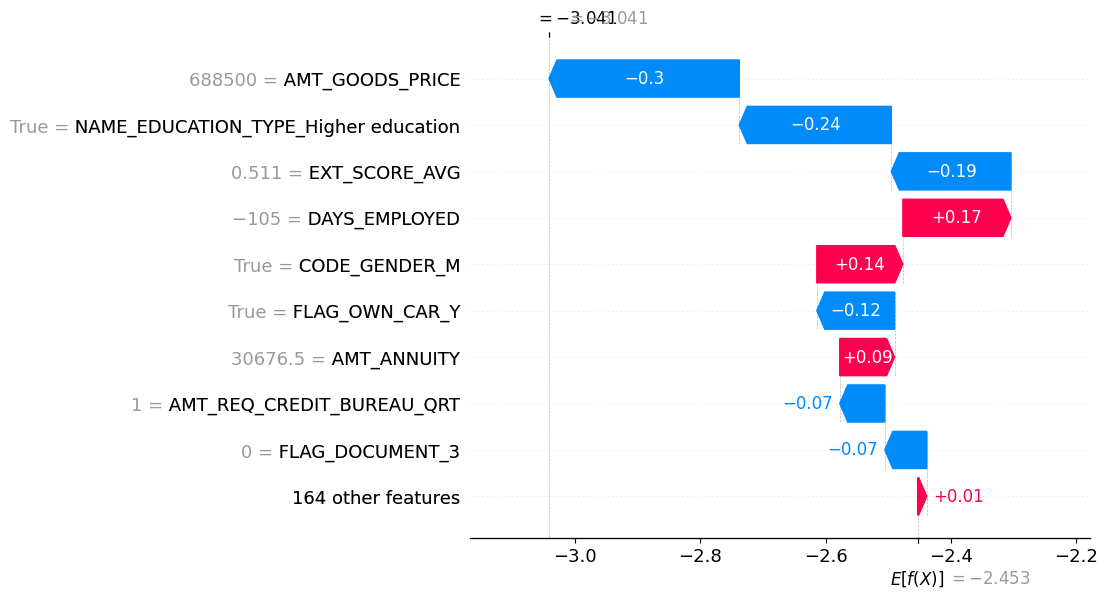

In [40]:
# Local Explanation: Single Prediction
shap.plots.waterfall(shap_values[0])